##This notebook is created for ABC2026 Decode the Invisible Challenge
https://sites.google.com/view/activity-location-challenge/the-challenge?authuser=0

prepared by: C.A. Garcia | Dec. 2025



**Data gathering in care facility (5th floor)**
- Beacons installed in facility as transmitter
- Mobile phone with app carried by caregiver acts as receiver
- Every location visited, RSSI is detected by mobile app.
- Accelerometer data is collected from the app of caregiver.

**User IDs used in Mobile App, each user carries a different phone**

->Location Server
- user ID 90: for 5th floor caregiver (collects sensor data - location and accelerometer)
- user ID 97: for 5th location labeling

->Activity Server
- user ID 87: for 5th activity labeling




In [ ]:
import pandas as pd
import numpy as np
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path = '/content/drive/MyDrive/Colab Notebooks/Assistant Prof 2024/ABC2026/ABC2026 Challenge_Data/Challenge_Kaikyokan/ABC2026 Sozolab Challenge/Dataset/BLE Data'

In [ ]:
#April data gathering 5th floor
#Case name
file_name = '4 day'
#Beacon dictionary
rssi_list = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16', '17','18','19','20', '21','22', '23','24','25']

mac_list = ['F7:7F:78:76:7E:F3',
            'C6:CD:5E:3D:2F:BB',
            'D6:F4:3A:79:74:63',
            'C9:17:55:E2:3E:0E',
            'CA:60:AB:EE:EC:7F',
            'D6:51:7F:AB:0E:29',
            'CC:54:33:F6:A7:90',
            'EB:20:56:87:04:5A',
            'EE:E7:46:DC:19:6F',
            'C8:5B:BF:37:07:A0',
            'D7:26:F6:A3:44:D2',
            'DD:83:B0:27:FD:36',
            'E5:CD:4A:36:87:06',
            'DC:22:B8:17:4E:B5',
            'EA:09:20:80:D6:44',
            'E6:99:D1:EC:C6:81',
            'F6:DA:97:C7:D5:28',
            'EA:66:A1:12:2C:F4',
            'C9:EA:57:8B:0F:80',
            'D6:7C:1D:2C:2A:0A',
            'DA:E1:70:5F:44:97',
            'DD:10:10:F6:4F:27',
            'E6:F3:93:A8:9E:22',
            'E6:60:05:1F:88:F9',
            'D4:33:FD:F4:C2:A8']


In [ ]:
file_list = os.listdir(data_path)

In [ ]:
#Load all the data with columns in the csv
csv_data = []
for csv_file in file_list:
  csv_data.append(pd.read_csv(os.path.join(data_path,csv_file),names=['user_id','timestamp','name', 'mac address', 'RSSI', 'power']))

In [ ]:
#Concate all the data
df = csv_data[0]
for i in range(1,len(csv_data)):
  df = pd.concat([df,csv_data[i]])

In [ ]:
print(df.shape)
df.head(5)

(5005751, 6)


,user_id,timestamp,name,mac address,RSSI,power
0,90,2023-04-12T11:22:03.622+0900,NaN,4F:F9:0E:CF:DD:38,-78,-2147483648
1,90,2023-04-12T11:22:03.628+0900,NaN,4F:F9:0E:CF:DD:38,-78,-2147483648
2,90,2023-04-12T11:22:03.633+0900,NaN,4F:F9:0E:CF:DD:38,-78,-2147483648
3,90,2023-04-12T11:22:03.639+0900,NaN,4F:F9:0E:CF:DD:38,-78,-2147483648
4,90,2023-04-12T11:22:03.645+0900,NaN,4F:F9:0E:CF:DD:38,-78,-2147483648


In [ ]:
df.dtypes

,0
user_id,int64
timestamp,object
name,object
mac address,object
RSSI,int64
power,int64


In [ ]:
df2 = df.sort_values(by='timestamp')
df2.head(2)

,user_id,timestamp,name,mac address,RSSI,power
0,90,2023-04-10T10:22:55.589+0900,NaN,FD:07:0E:D5:28:AE,-75,-2147483648
1,90,2023-04-10T10:22:55.595+0900,NaN,FD:07:0E:D5:28:AE,-75,-2147483648


In [ ]:
df2.tail(2)

,user_id,timestamp,name,mac address,RSSI,power
66,90,2023-04-13T13:56:21.626+0900,NaN,EE:E7:46:DC:19:6F,-91,-2147483648
67,90,2023-04-13T13:56:21.710+0900,NaN,EE:E7:46:DC:19:6F,-91,-2147483648


In [ ]:
#Convert to datetime format
df2['timestamp']= pd.to_datetime(
  pd.to_datetime(df2['timestamp'], format='%Y-%m-%dT%H:%M:%S.%f%z').dt.strftime('%Y-%m-%dT%H:%M:%S%z'),format='%Y-%m-%dT%H:%M:%S%z'
  )
df2

,user_id,timestamp,name,mac address,RSSI,power
0,90,2023-04-10 10:22:55+09:00,NaN,FD:07:0E:D5:28:AE,-75,-2147483648
1,90,2023-04-10 10:22:55+09:00,NaN,FD:07:0E:D5:28:AE,-75,-2147483648
2,90,2023-04-10 10:22:55+09:00,NaN,FD:07:0E:D5:28:AE,-75,-2147483648
3,90,2023-04-10 10:22:55+09:00,NaN,FD:07:0E:D5:28:AE,-75,-2147483648
4,90,2023-04-10 10:22:55+09:00,NaN,D2:1C:25:72:FB:E3,-62,-2147483648
...,...,...,...,...,...,...
63,90,2023-04-13 13:56:20+09:00,NaN,FA:31:FF:2E:D9:FD,-87,-2147483648
64,90,2023-04-13 13:56:20+09:00,NaN,FA:31:FF:2E:D9:FD,-87,-2147483648
65,90,2023-04-13 13:56:20+09:00,NaN,FA:31:FF:2E:D9:FD,-87,-2147483648
66,90,2023-04-13 13:56:21+09:00,NaN,EE:E7:46:DC:19:6F,-91,-2147483648


In [ ]:
df2.dtypes

,0
user_id,int64
timestamp,"datetime64[ns, UTC+09:00]"
name,object
mac address,object
RSSI,int64
power,int64


##Extract duration of experiment

In [ ]:
start = pd.to_datetime('2023-04-10T13:00:00.000+0900',format='%Y-%m-%dT%H:%M:%S.%f%z') # Day 1, 1 PM onwards
finish = pd.to_datetime('2023-04-13T17:29:59.999+0900',format='%Y-%m-%dT%H:%M:%S.%f%z') # Day 4, until 5:30 PM

In [ ]:
df_sep = df2[(df2["timestamp"] >=start) & (df2["timestamp"] <= finish)]
del df_sep['name']
df_sep

,user_id,timestamp,mac address,RSSI,power
120,90,2023-04-10 13:00:00+09:00,C9:17:55:E2:3E:0E,-91,-2147483648
121,90,2023-04-10 13:00:00+09:00,C9:17:55:E2:3E:0E,-91,-2147483648
122,90,2023-04-10 13:00:00+09:00,C9:17:55:E2:3E:0E,-91,-2147483648
123,90,2023-04-10 13:00:00+09:00,C9:17:55:E2:3E:0E,-91,-2147483648
124,90,2023-04-10 13:00:00+09:00,C9:17:55:E2:3E:0E,-91,-2147483648
...,...,...,...,...,...
63,90,2023-04-13 13:56:20+09:00,FA:31:FF:2E:D9:FD,-87,-2147483648
64,90,2023-04-13 13:56:20+09:00,FA:31:FF:2E:D9:FD,-87,-2147483648
65,90,2023-04-13 13:56:20+09:00,FA:31:FF:2E:D9:FD,-87,-2147483648
66,90,2023-04-13 13:56:21+09:00,EE:E7:46:DC:19:6F,-91,-2147483648


#Visualization

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
#Bar plot of Mac address

df2_10m = df_sep[df_sep["mac address"]==mac_list[0]]

for i in range(1,len(mac_list)):
  df2_10m = pd.concat([df2_10m, df_sep[df_sep["mac address"]==mac_list[i]]])
df2_10m = df2_10m.sort_values(by='timestamp')
df2_10m.head(2)

,user_id,timestamp,mac address,RSSI,power
126,90,2023-04-10 13:00:00+09:00,C9:17:55:E2:3E:0E,-91,-2147483648
204,90,2023-04-10 13:00:00+09:00,D6:51:7F:AB:0E:29,-96,-2147483648


In [ ]:
df2_10m_cv = df2_10m
for i in range(len(mac_list)):
  df2_10m_cv = df2_10m_cv.replace(mac_list[i],rssi_list[i])

df2_10m_cv

,user_id,timestamp,mac address,RSSI,power
126,90,2023-04-10 13:00:00+09:00,4,-91,-2147483648
204,90,2023-04-10 13:00:00+09:00,6,-96,-2147483648
205,90,2023-04-10 13:00:00+09:00,6,-96,-2147483648
206,90,2023-04-10 13:00:00+09:00,6,-96,-2147483648
207,90,2023-04-10 13:00:00+09:00,6,-96,-2147483648
...,...,...,...,...,...
56,90,2023-04-13 13:56:19+09:00,7,-99,-2147483648
57,90,2023-04-13 13:56:19+09:00,7,-99,-2147483648
36,90,2023-04-13 13:56:19+09:00,4,-96,-2147483648
66,90,2023-04-13 13:56:21+09:00,9,-91,-2147483648


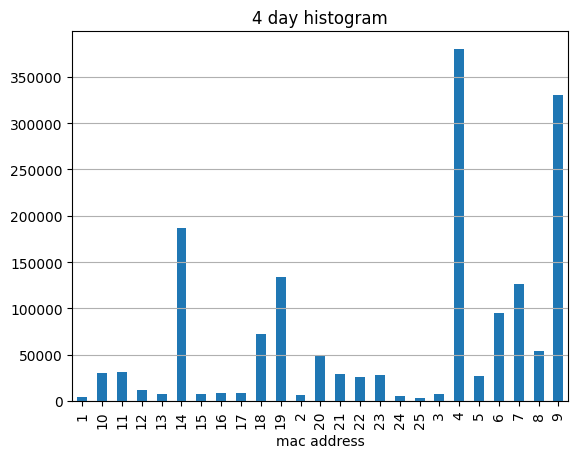

In [ ]:
#plot in set start and finish time
import matplotlib.animation as animation
for i in range(len(mac_list)):
  df2_10m_cv['mac address'].value_counts().sort_index().plot(kind='bar',title=file_name+' histogram').grid(axis='y');

In [ ]:
df2_10m_cv['mac address'].value_counts()

,count
mac address,
4,380092
9,330508
14,186595
19,133965
7,126759
6,94571
18,72750
8,53500
20,49706


In [ ]:
#check user ID of caregiver to match user ID 90: for 5th floor caregiver (collects sensor data - location and accelerometer)

print(df2_10m_cv['user_id'].value_counts())
print('\nTotal: {}'.format(len(df2_10m_cv['user_id'])))

user_id
90    1673395
Name: count, dtype: int64

Total: 1673395


In [ ]:
df2_10m_1mac_list = []
for i in range(len(mac_list)):
  df2_10m_1mac = df2_10m_cv[df2_10m_cv['mac address']==rssi_list[i]]
  df2_10m_1mac_list.append(df2_10m_1mac)

**check range of RSSI per beacon mac address**

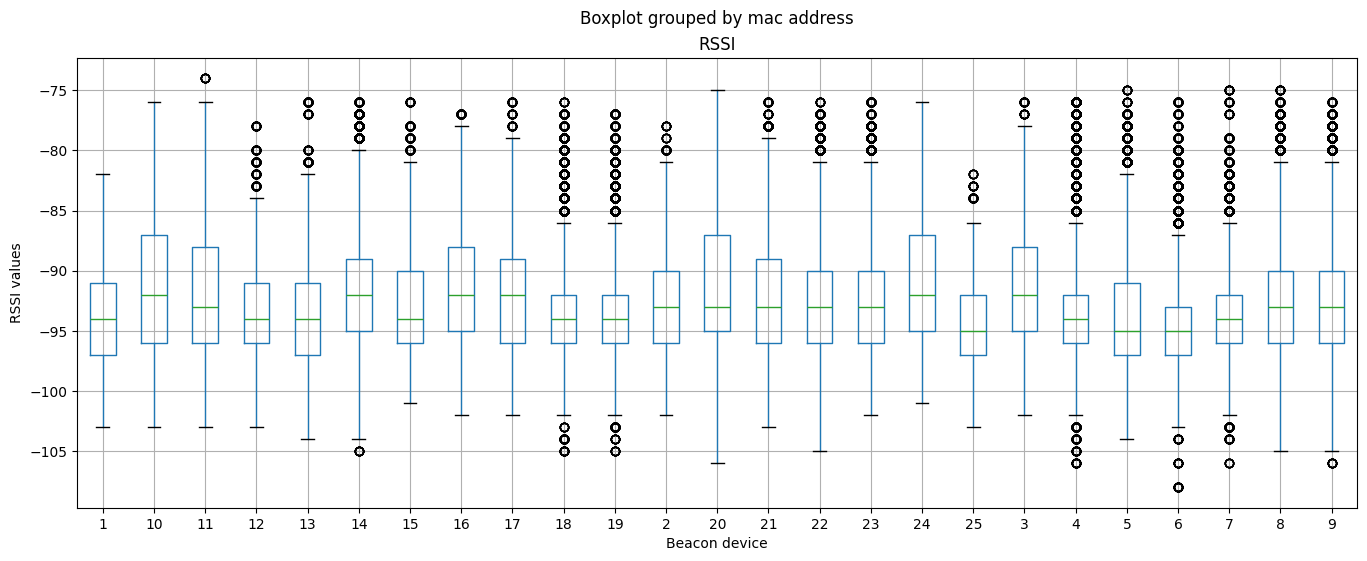

In [ ]:

# Set the figure size and create subplots
fig, ax = plt.subplots(figsize=(16, 6))  # Adjust the width as desired

# Generate the boxplot
df2_10m_cv.boxplot(by="mac address", column='RSSI', ax=ax)

# Set the x-axis label and y-axis label
ax.set_xlabel('Beacon device')
ax.set_ylabel('RSSI values')

plt.show()

**Visualize collected Location data per beacon, day and time**

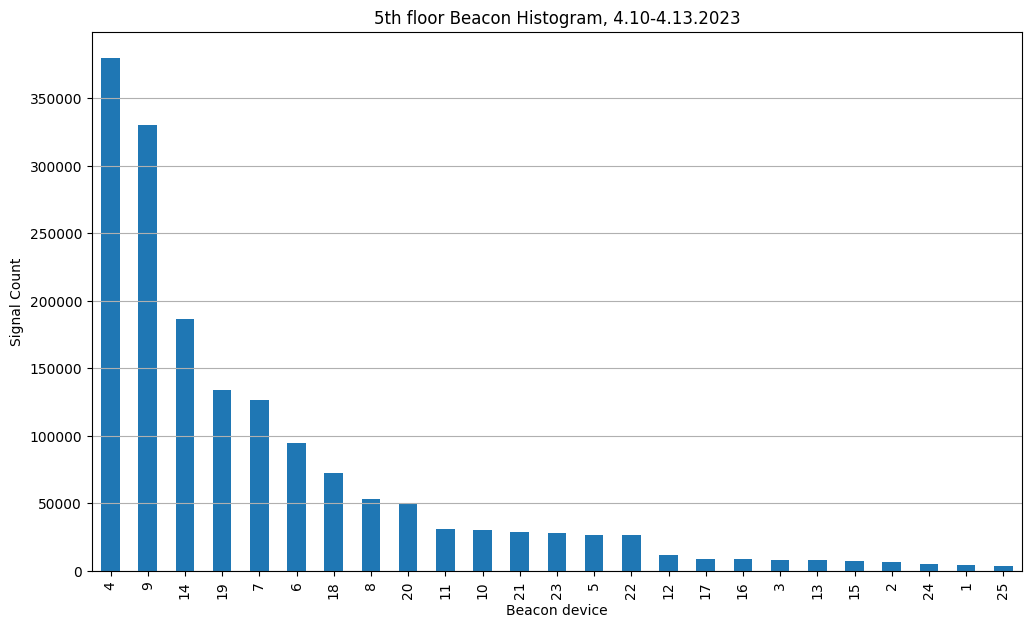

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))  # Adjust the width and height as desired
df2_10m_cv['mac address'].value_counts().plot(kind='bar', title='5th floor Beacon Histogram, 4.10-4.13.2023')
plt.xlabel('Beacon device')  # Label the x-axis as 'Beacon'
plt.ylabel('Signal Count')  # Label the y-axis as 'Signal Count'
plt.grid(axis='y')
plt.show()

In [ ]:
import plotly.express as px
import seaborn as sns
px.histogram(data_frame=df2_10m_cv,color='mac address',x='user_id',barmode='group',title='Locations visited by Caregiver, 4.10 - 4.13.2023')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import plotly.express as px
import seaborn as sns
px.histogram(data_frame=df2_10m_cv,color='user_id',x='mac address',barmode='group',title='Locations visited by Caregiver, 4.10 - 4.13.2023')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
df = df2_10m_cv.copy()

In [ ]:
import plotly.express as px

import plotly.express as px

df['timestamp'] = pd.to_datetime(df['timestamp'])  # Convert to datetime format

# Extract year, month, and day from the "timestamp" column
df['year_month_day'] = df['timestamp'].dt.to_period('D').dt.strftime('%Y-%m-%d')

# Calculate the count of activities per day
activities_per_day = df.groupby(['year_month_day', 'mac address']).size().reset_index(name='count')

# Create bar chart using plotly
fig = px.bar(
    data_frame=activities_per_day,
    x='year_month_day',
    y='count',
    color='mac address',  # Color bars by mac address
    title='Beacon Data per Day (5th floor), 04.10.2023 - 04.14.2023',
    text='count'  # Display count values on the bars
)

# Show the plot
fig.show()

/tmp/ipython-input-2177328564.py:8: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



In [ ]:
import plotly.express as px

df['timestamp'] = pd.to_datetime(df['timestamp'])  # Convert to datetime format

# Extract year, month, and day from the "timestamp" column
df['year_month_day'] = df['timestamp'].dt.to_period('D').dt.strftime('%Y-%m-%d')

# Calculate the total count of activities per day
total_per_day = df.groupby('year_month_day').size().reset_index(name='total_count')

# Create bar chart using plotly
fig = px.bar(
    data_frame=total_per_day,
    x='year_month_day',
    y='total_count',
    title='Total Beacon Data per Day (5th floor), 04.10.2023 - 04.14.2023',
    text='total_count',  # Display total count values on the bars
)

# Show the plot
fig.show()


/tmp/ipython-input-3962899212.py:6: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



In [ ]:
import plotly.express as px

df['timestamp'] = pd.to_datetime(df['timestamp'])  # Convert to datetime format

# Extract year, month, day, and hour from the "timestamp" column
df['hour'] = df['timestamp'].dt.hour

# Calculate the total count of activities per hour
total_per_hour = df.groupby('hour').size().reset_index(name='total_count')

# Create bar chart using plotly
fig = px.bar(
    data_frame=total_per_hour,
    x='hour',
    y='total_count',
    title='Total Beacon Data per Hour (5th floor), 04.10.2023 - 04.13.2023',
    text='total_count',  # Display total count values on the bars
)

# Set x-axis labels
fig.update_xaxes(title_text='Hour of the Day')

# Show the plot
fig.show()


In [ ]:
#check data if match count Total: 1774873
print(df['user_id'].value_counts())
print('\nTotal: {}'.format(len(df['user_id'])))

user_id
90    1673395
Name: count, dtype: int64

Total: 1673395


##Preprocessing: Separate RSSI per beacon per column for features

In [ ]:
#format timestamp
df['timestamp']=pd.to_datetime(df['timestamp'],format='%Y-%m-%d %H:%M:%S.%f').dt.tz_localize(None)
df = df.sort_values(by=['timestamp'])
df = df.reset_index(drop=True)
df.head()

,user_id,timestamp,mac address,RSSI,power,year_month_day,hour
0,90,2023-04-10 13:00:00,4,-91,-2147483648,2023-04-10,13
1,90,2023-04-10 13:00:00,4,-92,-2147483648,2023-04-10,13
2,90,2023-04-10 13:00:00,4,-91,-2147483648,2023-04-10,13
3,90,2023-04-10 13:00:00,4,-91,-2147483648,2023-04-10,13
4,90,2023-04-10 13:00:00,4,-91,-2147483648,2023-04-10,13


In [ ]:
#copy dataframe to preserve
df1 = df
df1.head(2)

,user_id,timestamp,mac address,RSSI,power,year_month_day,hour
0,90,2023-04-10 13:00:00,4,-91,-2147483648,2023-04-10,13
1,90,2023-04-10 13:00:00,4,-92,-2147483648,2023-04-10,13


**fill with zeroes initially as place holder, assume 0 RSSI to fill undetected beacons. You can also update this with negative values of your choice**

In [ ]:
# List of column names based on rssi_list
rssi_list = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16', '17','18','19','20', '21','22','23','24','25']

# Iterate through rssi_list and add columns to df with zero values
for column_name in rssi_list:
    df1[f'RSSI_{column_name}'] = 0  # Add a new column and fill it with zeros

# Display the updated DataFrame
print(df1)

         user_id           timestamp mac address  RSSI       power  \
0             90 2023-04-10 13:00:00           4   -91 -2147483648   
1             90 2023-04-10 13:00:00           4   -92 -2147483648   
2             90 2023-04-10 13:00:00           4   -91 -2147483648   
3             90 2023-04-10 13:00:00           4   -91 -2147483648   
4             90 2023-04-10 13:00:00           4   -91 -2147483648   
...          ...                 ...         ...   ...         ...   
1673390       90 2023-04-13 13:56:19           4   -96 -2147483648   
1673391       90 2023-04-13 13:56:19           4   -96 -2147483648   
1673392       90 2023-04-13 13:56:19           7   -99 -2147483648   
1673393       90 2023-04-13 13:56:21           9   -91 -2147483648   
1673394       90 2023-04-13 13:56:21           9   -91 -2147483648   

        year_month_day  hour  RSSI_1  RSSI_2  RSSI_3  ...  RSSI_16  RSSI_17  \
0           2023-04-10    13       0       0       0  ...        0        0   
1

In [ ]:
df1.head(2)

,user_id,timestamp,mac address,RSSI,power,year_month_day,hour,RSSI_1,RSSI_2,RSSI_3,...,RSSI_16,RSSI_17,RSSI_18,RSSI_19,RSSI_20,RSSI_21,RSSI_22,RSSI_23,RSSI_24,RSSI_25
0,90,2023-04-10 13:00:00,4,-91,-2147483648,2023-04-10,13,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,90,2023-04-10 13:00:00,4,-92,-2147483648,2023-04-10,13,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#check if same count with original data Total: 1673395
print(df1['user_id'].value_counts())
print('\nTotal: {}'.format(len(df1['user_id'])))

user_id
90    1673395
Name: count, dtype: int64

Total: 1673395


**check that all beacons 1-25 have created columns**

In [ ]:
df1.columns

Index(['user_id', 'timestamp', 'mac address', 'RSSI', 'power',
       'year_month_day', 'hour', 'RSSI_1', 'RSSI_2', 'RSSI_3', 'RSSI_4',
       'RSSI_5', 'RSSI_6', 'RSSI_7', 'RSSI_8', 'RSSI_9', 'RSSI_10', 'RSSI_11',
       'RSSI_12', 'RSSI_13', 'RSSI_14', 'RSSI_15', 'RSSI_16', 'RSSI_17',
       'RSSI_18', 'RSSI_19', 'RSSI_20', 'RSSI_21', 'RSSI_22', 'RSSI_23',
       'RSSI_24', 'RSSI_25'],
      dtype='object')

##Copy RSSI values to each respective column. Iterate through rssi_list

In [ ]:
for column_name in rssi_list:
    condition = df1['mac address'] == column_name
    df1[f'RSSI_{column_name}'] = 0  # Initialize with zero (or any default value)
    df1.loc[condition, f'RSSI_{column_name}'] = df1.loc[condition, 'RSSI']


# Display the updated DataFrame
df1.head()

,user_id,timestamp,mac address,RSSI,power,year_month_day,hour,RSSI_1,RSSI_2,RSSI_3,...,RSSI_16,RSSI_17,RSSI_18,RSSI_19,RSSI_20,RSSI_21,RSSI_22,RSSI_23,RSSI_24,RSSI_25
0,90,2023-04-10 13:00:00,4,-91,-2147483648,2023-04-10,13,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,90,2023-04-10 13:00:00,4,-92,-2147483648,2023-04-10,13,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,90,2023-04-10 13:00:00,4,-91,-2147483648,2023-04-10,13,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,90,2023-04-10 13:00:00,4,-91,-2147483648,2023-04-10,13,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,90,2023-04-10 13:00:00,4,-91,-2147483648,2023-04-10,13,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##Check value, note that empty fields are automatically zero as filled initially above

In [ ]:
#filter original dataframe mac address equal to beacon 1
df1[df1['mac address'] == '1']['RSSI'].value_counts()

,count
RSSI,
-96,589
-95,521
-98,420
-92,411
-97,383
-93,371
-90,332
-88,267
-94,245


In [ ]:
#filter column of mac address equal to beacon 1 to match
df1['RSSI_1'].value_counts()

,count
RSSI_1,
0,1668744
-96,589
-95,521
-98,420
-92,411
-97,383
-93,371
-90,332
-88,267


In [ ]:
#save a preprocessed dataframe. EDIT THE LOCATION OF FILE
df1.to_csv(r'/content/drive/MyDrive/Colab Notebooks/...../ABC2026 Sozolab Challenge/ble_train_4d.csv')
